In [1]:
import matplotlib.pyplot as plt
import numpy as np

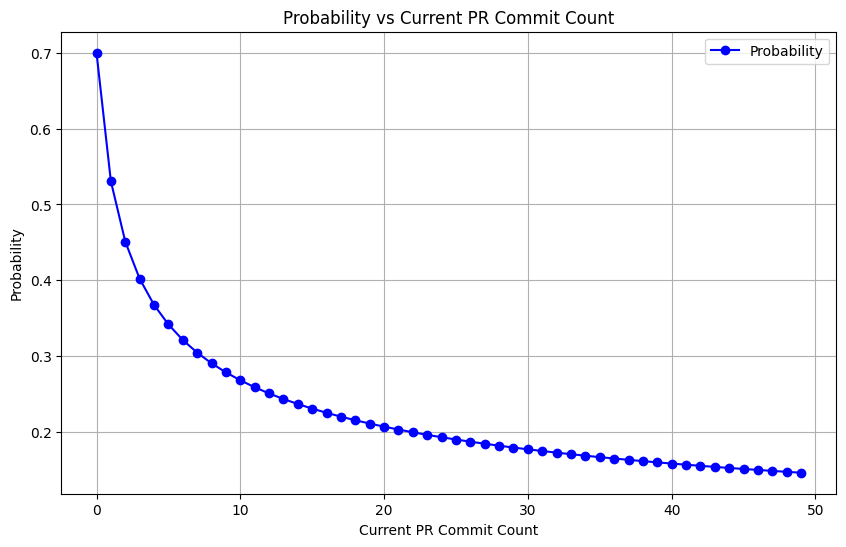

In [2]:
def calculate_probability(current_pr_commit_count, base_probability=0.7, pr_exponent=2.5):
    probability = base_probability * (1 / (current_pr_commit_count + 1)**(1 / pr_exponent))
    return probability

# Generate a range of values for current_pr_commit_count
current_pr_commit_counts = np.arange(0, 50, 1)

# Calculate probabilities for each value in the range
probabilities = [calculate_probability(count) for count in current_pr_commit_counts]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(current_pr_commit_counts, probabilities, marker='o', linestyle='-', color='b', label='Probability')
plt.xlabel('Current PR Commit Count')
plt.ylabel('Probability')
plt.title('Probability vs Current PR Commit Count')
plt.legend()
plt.grid(True)
plt.show()

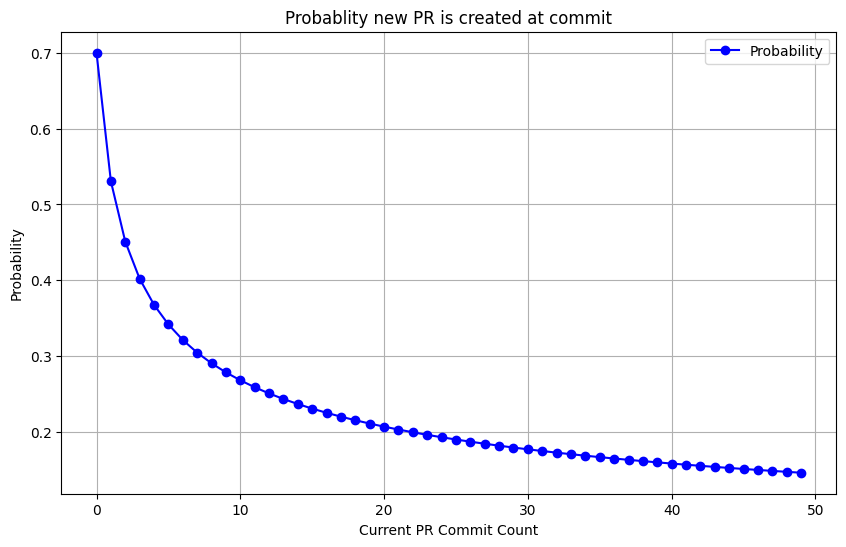

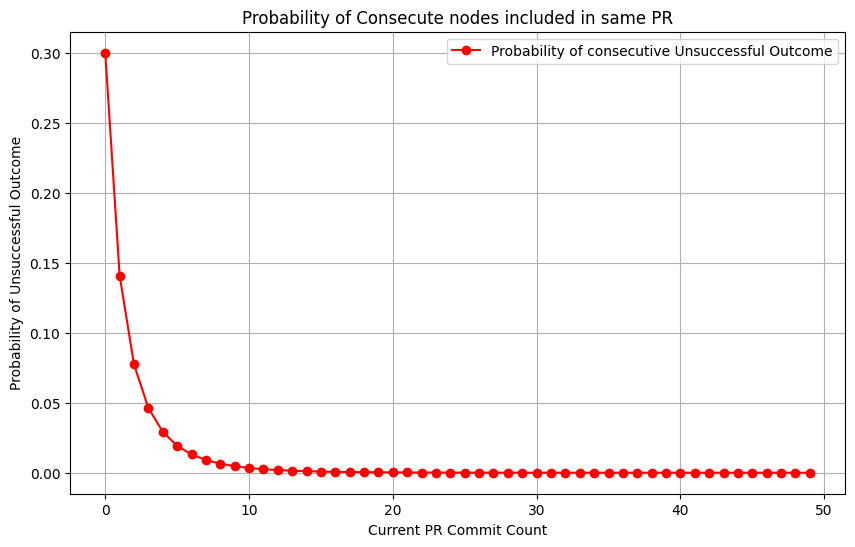

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_probability(current_pr_commit_count, base_probability=0.7, pr_exponent=2.5):
    return base_probability * (1 / (current_pr_commit_count + 1)**(1 / pr_exponent))

def calculate_unsuccessful_probability(current_pr_commit_counts):
    unsuccessful_probabilities = []
    cumulative_product = 1  # Start with a product of 1

    for count in current_pr_commit_counts:
        prob = calculate_probability(count)
        cumulative_product *= (1 - prob)
        unsuccessful_probabilities.append(cumulative_product)  # Probability of being unsuccessful
    
    return unsuccessful_probabilities

# Generate a range of values for current_pr_commit_count
current_pr_commit_counts = np.arange(0, 50, 1)

# Calculate probabilities for each value in the range
probabilities = [calculate_probability(count) for count in current_pr_commit_counts]

# Calculate unsuccessful probabilities for each value in the range
unsuccessful_probabilities = calculate_unsuccessful_probability(current_pr_commit_counts)

# Plot the original probability data
plt.figure(figsize=(10, 6))
plt.plot(current_pr_commit_counts, probabilities, marker='o', linestyle='-', color='b', label='Probability')
plt.xlabel('Current PR Commit Count')
plt.ylabel('Probability')
plt.title('Probablity new PR is created at commit')
plt.legend()
plt.grid(True)
plt.show()

# Plot the unsuccessful probability data
plt.figure(figsize=(10, 6))
plt.plot(current_pr_commit_counts, unsuccessful_probabilities, marker='o', linestyle='-', color='r', label='Probability of consecutive Unsuccessful Outcome')
plt.xlabel('Current PR Commit Count')
plt.ylabel('Probability of Unsuccessful Outcome')
plt.title('Probability of Consecute nodes included in same PR')
plt.legend()
plt.grid(True)
plt.show()


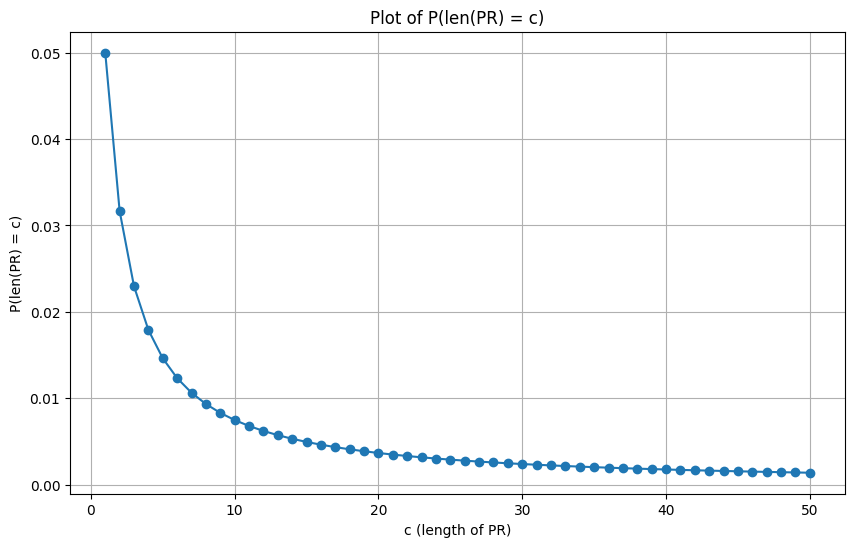

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
P_base = 0.1
alpha = 1

# Function definitions
def P_new_pr(c, P_base, alpha):
    return P_base * (1 / (c + 1) ** (1 / alpha))

def P_len_PR(c, P_base, alpha):
    product_term = np.prod([1 - P_new_pr(n, P_base, alpha) for n in range(1, c)])
    return P_new_pr(c, P_base, alpha) * product_term

# Generate values for c
c_values = np.arange(1, 51)
P_values = [P_len_PR(c, P_base, alpha) for c in c_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(c_values, P_values, marker='o')
plt.xlabel('c (length of PR)')
plt.ylabel('P(len(PR) = c)')
plt.xscale('linear')
plt.yscale('linear')
plt.title('Plot of P(len(PR) = c)')
plt.grid(True)
plt.show()
